In [44]:
import pandas as pd

In [45]:
df = pd.read_csv('data.csv')

In [46]:
row_sample = df.sample(frac=0.02)

In [47]:
row_sample.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5600816,394,CASH_OUT,204558.51,C1722545882,9366.0,0.00,C972727567,1220588.82,1425147.33,0,0
180985,12,TRANSFER,1105276.05,C378780349,0.0,0.00,C1681202502,2645812.39,3536349.73,0,0
1404432,139,PAYMENT,9903.13,C382199510,0.0,0.00,M397938727,0.00,0.00,0,0
3392861,255,PAYMENT,1361.71,C1502166855,11719.0,10357.29,M477254903,0.00,0.00,0,0
5197977,369,CASH_OUT,312066.70,C1173134197,50636.0,0.00,C2133500034,1463210.78,1775277.49,0,0


In [48]:
def perform_eda(df: pd.DataFrame):
    print("========================================")
    print("Exploratory Data Analysis")
    print("========================================\n")

    # Print the shape of the DataFrame
    print("Shape of the DataFrame:")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}\n")

    print("========================================\n")

    # Print the column names
    print("Columns in the DataFrame:")
    for col in df.columns:
        print(col)
    print("\n========================================\n")

    # Print the information about the DataFrame
    print("Information about the DataFrame:")
    df.info()
    print("\n========================================\n")

    # Print the number of null values in each column
    print("Number of null values in each column:")
    print(df.isnull().sum())
    print("\n========================================\n")

    # Print the number of unique values in each column
    print("Number of unique values in each column:")
    print(df.nunique())
    print("\n========================================\n")

    # Print the descriptive statistics for each column
    print("Descriptive statistics for each column:")
    return df.describe()
    print("\n========================================\n")


In [49]:
perform_eda(row_sample)

Exploratory Data Analysis

Shape of the DataFrame:
Number of rows: 127252
Number of columns: 11


Columns in the DataFrame:
step
type
amount
nameOrig
oldbalanceOrg
newbalanceOrig
nameDest
oldbalanceDest
newbalanceDest
isFraud
isFlaggedFraud


Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 127252 entries, 5600816 to 1119102
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            127252 non-null  int64  
 1   type            127252 non-null  object 
 2   amount          127252 non-null  float64
 3   nameOrig        127252 non-null  object 
 4   oldbalanceOrg   127252 non-null  float64
 5   newbalanceOrig  127252 non-null  float64
 6   nameDest        127252 non-null  object 
 7   oldbalanceDest  127252 non-null  float64
 8   newbalanceDest  127252 non-null  float64
 9   isFraud         127252 non-null  int64  
 10  isFlaggedFraud  127252 non-null  int64  
dtypes: float

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,127252.000000,1.272520e+05,1.272520e+05,1.272520e+05,1.272520e+05,1.272520e+05,127252.000000,127252.0
mean,242.869055,1.779263e+05,8.558804e+05,8.775345e+05,1.124900e+06,1.246501e+06,0.001147,0.0
std,142.345203,5.783222e+05,2.952475e+06,2.989991e+06,3.672544e+06,3.908407e+06,0.033853,0.0
min,1.000000,4.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,155.000000,1.353305e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,239.000000,7.523696e+04,1.429226e+04,0.000000e+00,1.359069e+05,2.174710e+05,0.000000,0.0
75%,334.000000,2.086236e+05,1.078968e+05,1.440327e+05,9.503809e+05,1.119047e+06,0.000000,0.0
max,741.000000,5.894475e+07,3.368536e+07,3.391070e+07,2.498603e+08,2.519574e+08,1.000000,0.0


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

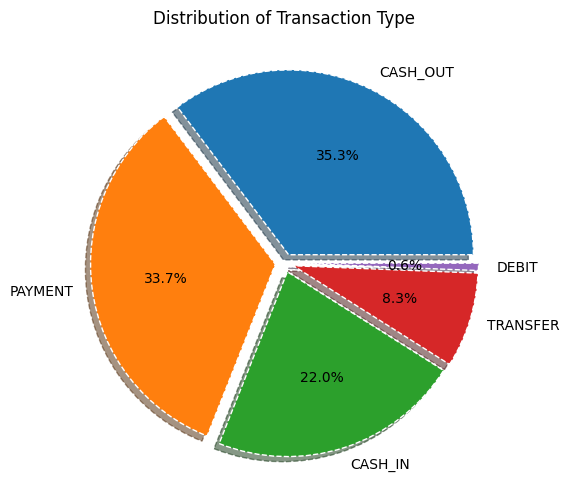

In [51]:
type = row_sample["type"].value_counts()
transactions = type.index
quantity = type.values

# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(quantity, labels = transactions, autopct='%1.1f%%',shadow=True, explode=[0.05]*5, wedgeprops={"edgecolor":"white","linestyle":"dashed"})
plt.title("Distribution of Transaction Type")
plt.show()


<Axes: >

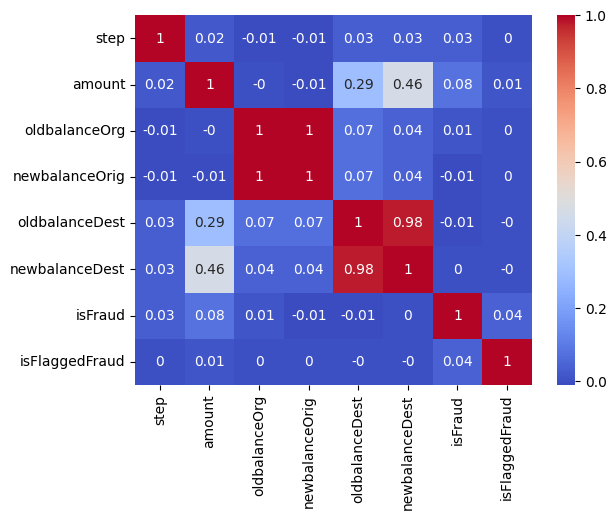

In [52]:
correlation = df.corr(numeric_only = True)
sns.heatmap(correlation.round(2), annot=True, cmap='coolwarm')

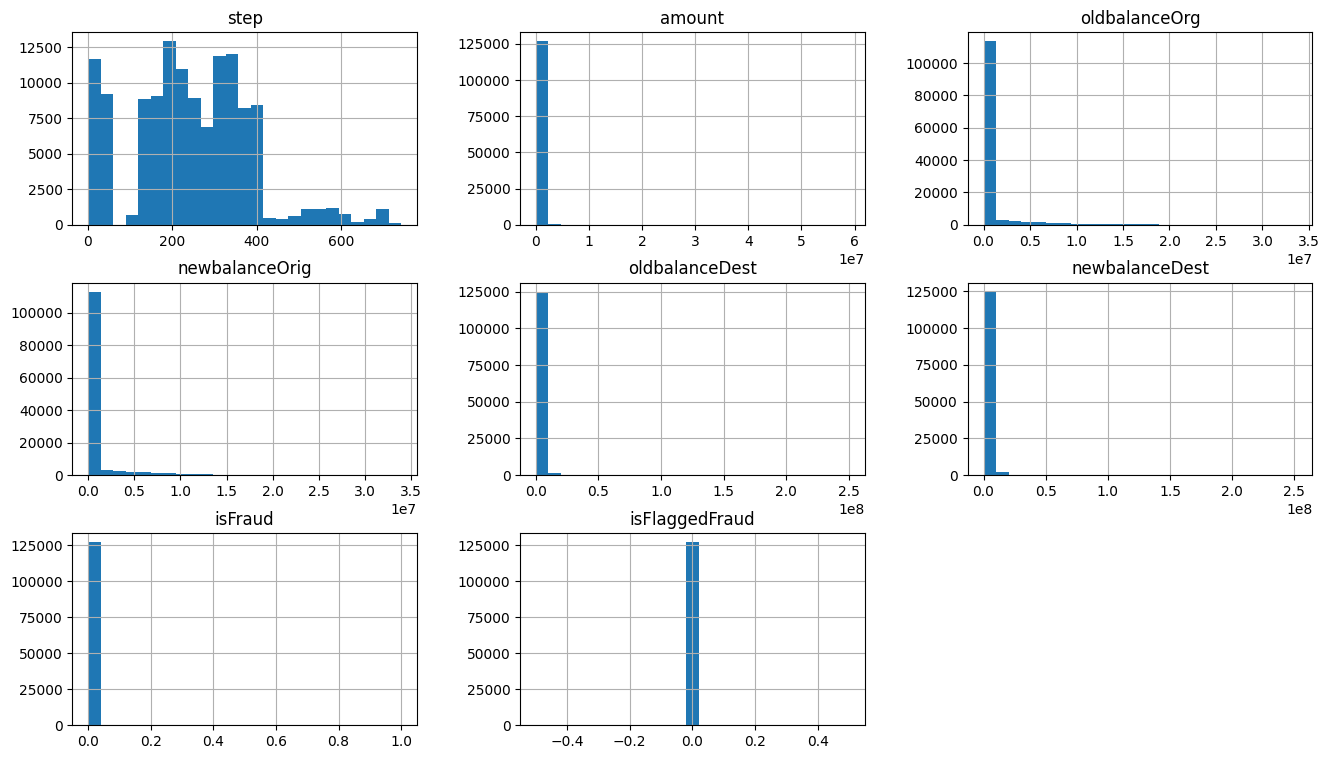

In [53]:
row_sample.hist(figsize=(16,9),bins=25)
plt.show()

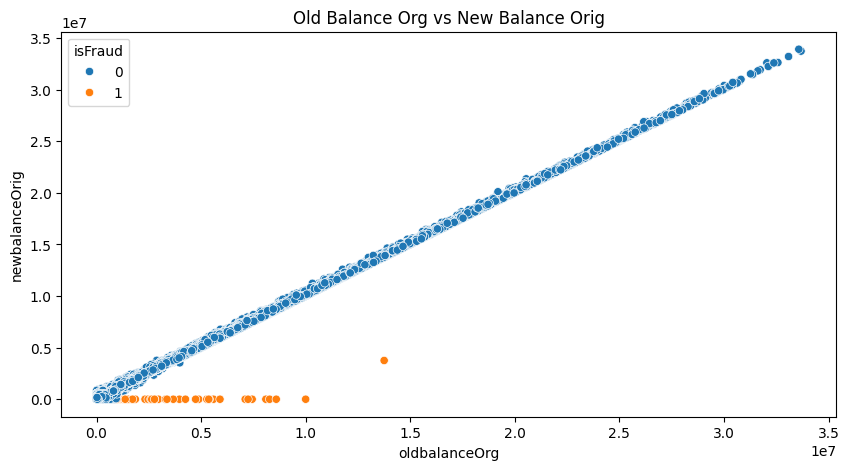

In [54]:
#Visualizing the relationship between 'oldbalanceOrg' and 'newbalanceOrig'
plt.figure(figsize=(10,5))
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', data=row_sample)
plt.title('Old Balance Org vs New Balance Orig')
plt.show()

**Here are the findings:**
* **Fraudulent Transactions:** The orange data points, representing fraudulent transactions (isFraud: 1), tend to show a higher new balance compared to the old balance. This suggests that in cases of fraud, the new balance is often inflated.
* **Non-Fraudulent Transactions:** The blue data points, representing non-fraudulent transactions (isFraud: 0), are densely packed along a diagonal line, indicating a direct and proportional relationship between the old and new balances.
* **Correlation:** There is a clear correlation for non-fraudulent transactions, where the new balance closely follows the old balance. However, for fraudulent transactions, this correlation is disrupted, showing a pattern where the new balance can be significantly higher than the old balance.

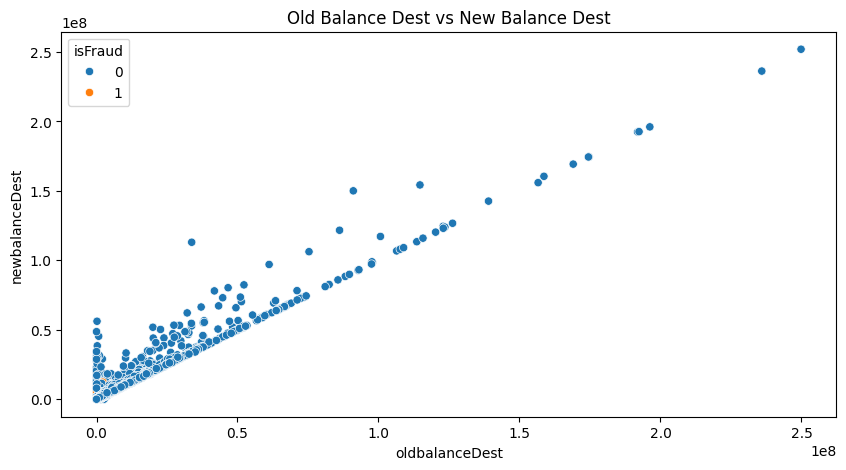

In [55]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='oldbalanceDest', y='newbalanceDest', hue='isFraud', data=row_sample)
plt.title('Old Balance Dest vs New Balance Dest')
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [57]:
# Define your features
features = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest', 'oldbalanceDest']

# Define X and y
X = row_sample[features]
y = row_sample['isFraud']

In [58]:
# Convert categorical variable(s) into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

In [59]:
X.columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest',
       'oldbalanceDest', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'],
      dtype='object')

In [60]:
# Create a scaler object
scaler = MinMaxScaler()

In [61]:
# Fit and transform the features
X_scaled = scaler.fit_transform(X)
# Convert the scaled features into a dataframe
X = pd.DataFrame(X_scaled, columns=X.columns)

In [62]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [63]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators = 150, class_weight='balanced', random_state=101)

In [64]:
print(X_train.columns)

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest',
       'oldbalanceDest', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'],
      dtype='object')


In [65]:
# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=150,
                       random_state=101)

In [66]:
# Make predictions
y_pred = clf.predict(X_test)

In [67]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[25419     0]
 [   10    22]]


In [68]:
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25419
           1       1.00      0.69      0.81        32

    accuracy                           1.00     25451
   macro avg       1.00      0.84      0.91     25451
weighted avg       1.00      1.00      1.00     25451



In [69]:
# Print the accuracy score
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.9996070881301324


In [70]:
import pickle
with open('model_rfc.pkl', 'wb') as file:
    pickle.dump(clf, file)
